In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "encodedcustomersaddresses"      "newcusdemo"                    
[3] "spyrocket-transactions-dataset"

## This notebook contains my thought process as i work on a KPMG dataset to answer some business questions

##INTRODUCTION


Sprocket Centrak Pty Ltd hired the analytics team of my pretend-company to understand which of the 100 new customers in their database should be targeted to maximize profits in the next quarter. An initail assessment report was requested by Sprocket. After the assesment of their dataset, i found:
1.	Missing Values:
    There are over fourteen columns with missing values throughout the datasets, particularly in the Transactions dataset, New_Customer_list and Customer Demographics Dataset. To address this, we should consider strategies such as data imputation, or requesting additional data sources if applicable since the columns with the missing values have comprehensive data in their rows.
    
2.	Null and Nil Values:
    In addition to missing values, there are three columns with fields that contain "null" or "nil" entries. It is essential to clarify the meaning of these values and standardize them as "N/A" or an appropriate missing data indicator.
    
3.	Wrong Data Types:
    I noticed several inconsistencies in data types. For example, columns that should contain dates were stored as text, and numerical data is incorrectly categorized as text. To rectify this, we should ensure that the data types are accurately defined, which should improve analysis accuracy and efficiency.
    
4.	Currency Stored as Numbers:
    Currency values were stored as pure numbers The column named standard_cost in the Transactions dataset has many of its values stored as pure numbers. We can create a consistent currency format or separate columns for the currency codes to address this issue.
    
5.	Spelling Errors:
    There are instances of spelling errors in the gender column in the Customer Demographics dataset, which may affect data integrity. We can conduct data cleansing to correct these errors and establish a standard format for data entry.

My report for fixing these inconsitencies were approved and i went to work

In [2]:
install.packages("tidyverse")
install.packages("readr")
install.packages("readxl")

library(tidyverse)
library(readr)
library(readxl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
CustomerAddress <- read_excel('/kaggle/input/spyrocket-transactions-dataset/Customer_Address.xlsx')

head(CustomerAddress)
str(CustomerAddress)


customer_id,address,postcode,state,country,property_valuation
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9
7,4 Delaware Trail,2210,New South Wales,Australia,9


tibble [3,999 × 6] (S3: tbl_df/tbl/data.frame)
 $ customer_id       : num [1:3999] 1 2 4 5 6 7 8 9 11 12 ...
 $ address           : chr [1:3999] "060 Morning Avenue" "6 Meadow Vale Court" "0 Holy Cross Court" "17979 Del Mar Point" ...
 $ postcode          : num [1:3999] 2016 2153 4211 2448 3216 ...
 $ state             : chr [1:3999] "New South Wales" "New South Wales" "QLD" "New South Wales" ...
 $ country           : chr [1:3999] "Australia" "Australia" "Australia" "Australia" ...
 $ property_valuation: num [1:3999] 10 10 9 4 9 9 4 12 8 4 ...


Let me look at other datasets

In [4]:
Transactions <- read_excel('/kaggle/input/spyrocket-transactions-dataset/Transactions.xlsx')
str(Transactions)
head(Transactions)

tibble [20,000 × 13] (S3: tbl_df/tbl/data.frame)
 $ transaction_id         : num [1:20000] 1 2 3 4 5 6 7 8 9 10 ...
 $ product_id             : num [1:20000] 2 3 37 88 78 25 22 15 67 12 ...
 $ customer_id            : num [1:20000] 2950 3120 402 3135 787 ...
 $ transaction_date       : POSIXct[1:20000], format: "2017-02-25" "2017-05-21" ...
 $ online_order           : chr [1:20000] "FALSE" "TRUE" "FALSE" "FALSE" ...
 $ order_status           : chr [1:20000] "Approved" "Approved" "Approved" "Approved" ...
 $ brand                  : chr [1:20000] "Solex" "Trek Bicycles" "OHM Cycles" "Norco Bicycles" ...
 $ product_line           : chr [1:20000] "Standard" "Standard" "Standard" "Standard" ...
 $ product_class          : chr [1:20000] "medium" "medium" "low" "medium" ...
 $ product_size           : chr [1:20000] "medium" "large" "medium" "medium" ...
 $ list_price             : num [1:20000] 71.5 2091.5 1793.4 1198.5 1765.3 ...
 $ standard_cost          : num [1:20000] 53.6 388.9 248.8 38

transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
<dbl>,<dbl>,<dbl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,2,2950,2017-02-25,FALSE,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,3,3120,2017-05-21,TRUE,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,37,402,2017-10-16,FALSE,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,88,3135,2017-08-31,FALSE,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145
5,78,787,2017-10-01,TRUE,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226
6,25,2339,2017-03-08,TRUE,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031


In [5]:
CustomerDemo <- read_excel('/kaggle/input/spyrocket-transactions-dataset/Customer_Demographic.xlsx')
head(CustomerDemo)

Warning message:
“Expecting logical in N2520 / R2520C14: got 'Loeber'”
Warning message:
“Expecting date in F3915 / R3915C6: got '1843-12-21'”
Warning message:
“Expecting date in F3916 / R3916C6: got 'Null'”
Warning message:
“Expecting numeric in M3916 / R3916C13: got 'Null'”
Warning message:
“Expecting date in F3917 / R3917C6: got 'Null'”
Warning message:
“Expecting numeric in M3917 / R3917C13: got 'Null'”
Warning message:
“Expecting date in F3918 / R3918C6: got 'Null'”
Warning message:
“Expecting numeric in M3918 / R3918C13: got 'Null'”
Warning message:
“Expecting date in F3919 / R3919C6: got 'Null'”
Warning message:
“Expecting numeric in M3919 / R3919C13: got 'Null'”
Warning message:
“Expecting date in F3920 / R3920C6: got 'Null'”
Warning message:
“Expecting numeric in M3920 / R3920C13: got 'Null'”
Warning message:
“Expecting date in F3921 / R3921C6: got 'Null'”
Warning message:
“Expecting numeric in M3921 / R3921C13: got 'Null'”
Warning message:
“Expecting date in F3922 / R3922C6: g

customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,...14
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>
720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6,NA
1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5,NA
3410,Merrili,Brittin,Female,93,1940-09-22,Null,Property,Mass Customer,N,á,No,16,NA
2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17,NA
658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8,NA
1243,Robbert,Blakey,Male,73,1953-08-09,Research Assistant II,Retail,Mass Customer,N,"""'",No,8,NA


# Structuring Stage of EDA
#Extracting the most important columns in each dataset to help us answer the business task which is to predict which of the 1000 new customers to target.

I will be selecting almost all the columns becasue i want to CLEAN all the columns to help me answer any other questions that i am curious about

In [6]:
customerDemoSubset <-  CustomerDemo %>% 
  select(customer_id, first_name, last_name, gender, past_3_years_bike_related_purchases, DOB, job_title, job_industry_category, wealth_segment, deceased_indicator, owns_car, tenure)

summary(customerDemoSubset)

  customer_id    first_name         last_name            gender         
 Min.   :   1   Length:4001        Length:4001        Length:4001       
 1st Qu.:1001   Class :character   Class :character   Class :character  
 Median :2000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2000                                                           
 3rd Qu.:3000                                                           
 Max.   :4000                                                           
 NA's   :1                                                              
 past_3_years_bike_related_purchases      DOB                     
 Min.   : 0.00                       Min.   :1931-10-23 00:00:00  
 1st Qu.:24.00                       1st Qu.:1968-01-25 00:00:00  
 Median :48.00                       Median :1977-07-25 00:00:00  
 Mean   :48.89                       Mean   :1977-07-25 11:13:15  
 3rd Qu.:73.00                       3rd Qu.:1987-02-28 06:00:00  
 Max.   :99.00

# DATA CLEANSING

In [7]:
cleanedCusDemo <- na.omit(customerDemoSubset)
cleanedCusDemo <- distinct(cleanedCusDemo)

The date column seems to be in a date time format. date time appears in the 2 datasets of this study. I want to confirm it. 

In [8]:
class(cleanedCusDemo$DOB)
print(class)

head(cleanedCusDemo)

[1] "POSIXct" "POSIXt"

function (x)  .Primitive("class")


customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6
1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,No,5
3410,Merrili,Brittin,Female,93,1940-09-22,Null,Property,Mass Customer,N,No,16
2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17
658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8
1243,Robbert,Blakey,Male,73,1953-08-09,Research Assistant II,Retail,Mass Customer,N,No,8


Repeating the process for the Transactions and Address Dataset

In [9]:
cleanedTrans <- na.omit(Transactions)
cleanedTrans <- distinct(cleanedTrans)

class(cleanedTrans$transaction_date)
print(class)

head(cleanedTrans)

[1] "POSIXct" "POSIXt"

function (x)  .Primitive("class")


transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
<dbl>,<dbl>,<dbl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,2,2950,2017-02-25,FALSE,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,3,3120,2017-05-21,TRUE,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,37,402,2017-10-16,FALSE,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,88,3135,2017-08-31,FALSE,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145
5,78,787,2017-10-01,TRUE,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226
6,25,2339,2017-03-08,TRUE,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031


In [10]:
cleanedCusAdd <- na.omit(CustomerAddress)
cleanedCusAdd <- distinct(cleanedCusAdd)


# Exploration

1000 new customers identified:  
I will select and merge certains datasets to help answer this question.
I will order by tansaction date as this is the best way to target customers who have purchased recently. 

In [11]:
cleanedCusDemo <-  cleanedCusDemo %>% 
  select(customer_id, first_name, last_name, DOB, tenure)

cleanedTrans <- cleanedTrans %>% 
  select(customer_id, transaction_date)


In [12]:
merged_data <- merge(cleanedCusDemo, cleanedTrans, by = "customer_id", all.x = TRUE)

newest_customers <- merged_data %>%
  arrange(desc(transaction_date)) %>%
  head(1000) %>%
  select(customer_id, first_name, last_name, DOB, tenure, transaction_date)

head(newest_customers)

,customer_id,first_name,last_name,DOB,tenure,transaction_date
,<dbl>,<chr>,<chr>,<dttm>,<dbl>,<dttm>
1,17,Heath,Faraday,1962-03-19,15,2017-12-30
2,86,Job,Sleney,1989-03-04,7,2017-12-30
3,151,Donnie,Brimson,1965-01-31,13,2017-12-30
4,195,Talyah,Rylatt,1958-11-14,6,2017-12-30
5,256,Linell,Beadle,1975-05-07,21,2017-12-30
6,362,Jamima,Pirolini,1974-11-17,18,2017-12-30


# Geographical Segmentation

I want to identify states with the highest concentration of customers. I want to explore whether certain areas have higher property valuations, which may influence purchasing behavior. This analysis can inform targeted marketing efforts and expansion strategies.

In [13]:

# the customer address dataset was not geo-coded. I had it geo-coded online and reloaded it for cleaning beofore analysis
CusAddGeo <- read_csv('/kaggle/input/encodedcustomersaddresses/geocodedCusAddress.csv')

head(CusAddGeo)

New names:
• `state` -> `state...4`
• `country` -> `country...5`
• `state` -> `state...11`
• `country` -> `country...13`
Rows: 499 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): address, state...4, country...5, formatted, state...11, state_code...
dbl  (7): customer_id, postcode, property_valuation, lat, lng, confidence, a...
lgl  (1): name

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


customer_id,address,postcode,state...4,country...5,property_valuation,lat,lng,formatted,name,state...11,state_code,country...13,country_au,confidence,attribution,area_of_the_state,https://www.geonames.org/datasources/
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
1,060 Morning Avenue,2016,New South Wales,Australia,10,-31.87598,147.2869,"New South Wales, Australia",NA,New South Wales,NSW,Australia,au,1,© OpenStreetMap contributors,801150,https://www.openstreetmap.org/copyright
2,6 Meadow Vale Court,2153,New South Wales,Australia,10,-31.87598,147.2869,"New South Wales, Australia",NA,New South Wales,NSW,Australia,au,1,© OpenStreetMap contributors,801150,https://www.openstreetmap.org/copyright
4,0 Holy Cross Court,4211,Queensland,Australia,9,-22.16468,144.5845,"Queensland, Australia",NA,Queensland,QLD,Australia,au,1,© OpenStreetMap contributors,1727200,https://www.openstreetmap.org/copyright
5,17979 Del Mar Point,2448,New South Wales,Australia,4,-31.87598,147.2869,"New South Wales, Australia",NA,New South Wales,NSW,Australia,au,1,© OpenStreetMap contributors,801150,https://www.openstreetmap.org/copyright
6,9 Oakridge Court,3216,Victoria,Australia,9,-36.59861,144.6780,"Victoria, Australia",NA,Victoria,VIC,Australia,au,1,© OpenStreetMap contributors,227600,https://www.openstreetmap.org/copyright
7,4 Delaware Trail,2210,New South Wales,Australia,9,-31.87598,147.2869,"New South Wales, Australia",NA,New South Wales,NSW,Australia,au,1,© OpenStreetMap contributors,801150,https://www.openstreetmap.org/copyright


Now i have what i need

In [14]:
names(CusAddGeo)

[1] "customer_id"                          
 [2] "address"                              
 [3] "postcode"                             
 [4] "state...4"                            
 [5] "country...5"                          
 [6] "property_valuation"                   
 [7] "lat"                                  
 [8] "lng"                                  
 [9] "formatted"                            
[10] "name"                                 
[11] "state...11"                           
[12] "state_code"                           
[13] "country...13"                         
[14] "country_au"                           
[15] "confidence"                           
[16] "attribution"                          
[17] "area_of_the_state"                    
[18] "https://www.geonames.org/datasources/"

Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,Archs,MD5sum,NeedsCompilation,Built


HTML widgets cannot be represented in plain text (need html)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



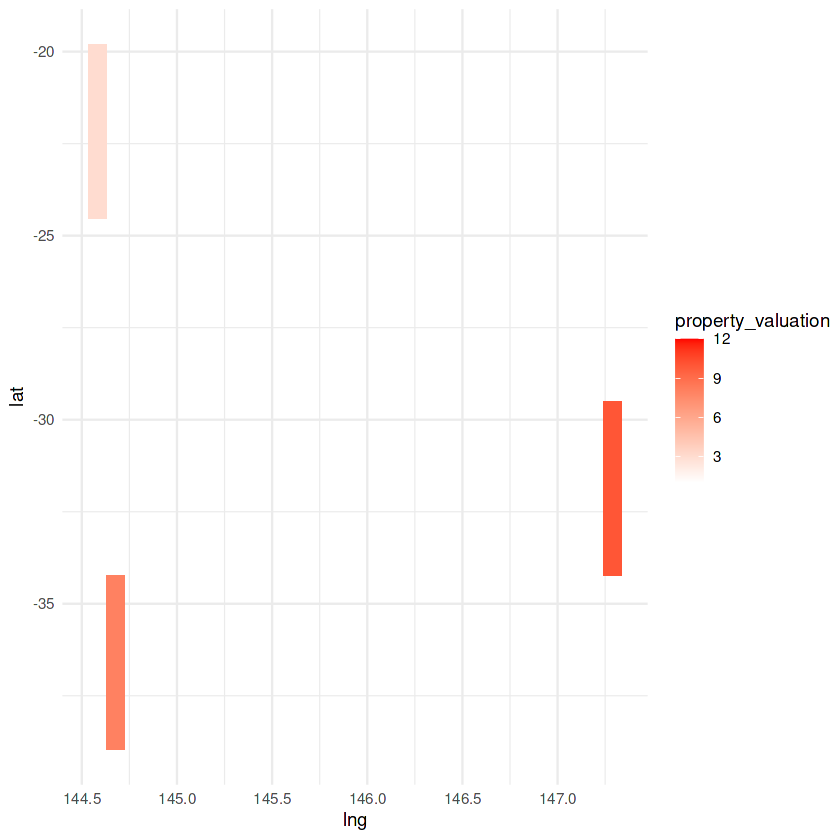

In [15]:
# Geographical Visualization
installed.packages("leaflet")
library(leaflet)

# 
leaflet(CusAddGeo) %>% 
  addTiles() %>% 
  addCircles(lat = ~lat, lng = ~lng, color = "blue", fillOpacity = 0.5, 
             radius = ~sqrt(CusAddGeo$property_valuation) * 1000, 
             popup = ~paste("Property Valuation: $", CusAddGeo$property_valuation))

# Identifing Concentration Areas
concentration_areas <- CusAddGeo %>%
  group_by(state...4) %>%
  reframe(total_customers = n())

# Property Valuation Analysis
average_valuation_by_country <- CusAddGeo %>%
  group_by(state...4) %>%
  reframe(average_valuation = mean(property_valuation))

# Customer Density Analysis
customer_density <- CusAddGeo %>%
  group_by(state...4) %>%
  reframe(customer_density = n() / area_of_the_state)

# Install and load necessary libraries
install.packages("ggplot2")
library(ggplot2)

ggplot(CusAddGeo, aes(x = lng, y = lat, fill = property_valuation)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "red") +
  theme_minimal()


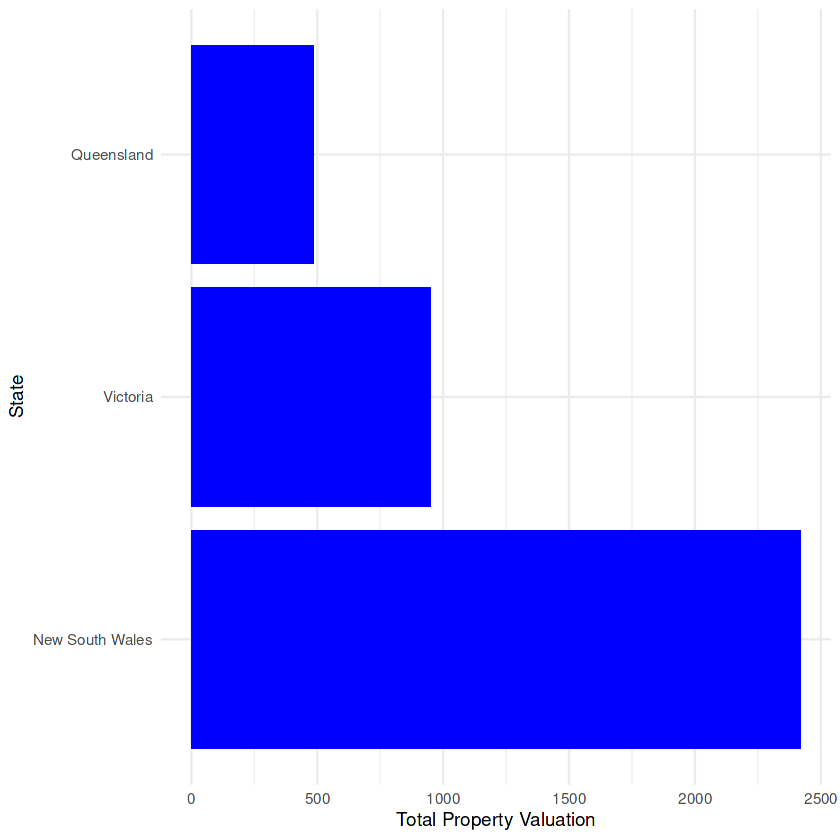

In [16]:

#To clearly see the states with the highest valuation
CusAddGeo_agg <- aggregate(property_valuation ~ state...4, CusAddGeo, sum)

# Horizontal Bar Plot
ggplot(CusAddGeo_agg, aes(x = reorder(state...4, -property_valuation), y = property_valuation)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(x = "State", y = "Total Property Valuation") +
  theme_minimal() +
  coord_flip()

# Voila

New South Wales has the most Property Valuation. spyrocket can target them as they may have more purchasing power. 

# Transaction Analysis

I want to explore patterns and trends in customer transactions using metrics such as average transaction value, frequency of purchases, and preferred product categories or brands. I will visualize transaction trends over time and identify peak sales periods. This analysis can help optimize inventory management, marketing strategies, and product offerings.

In [17]:
names(Transactions)

[1] "transaction_id"          "product_id"             
 [3] "customer_id"             "transaction_date"       
 [5] "online_order"            "order_status"           
 [7] "brand"                   "product_line"           
 [9] "product_class"           "product_size"           
[11] "list_price"              "standard_cost"          
[13] "product_first_sold_date"

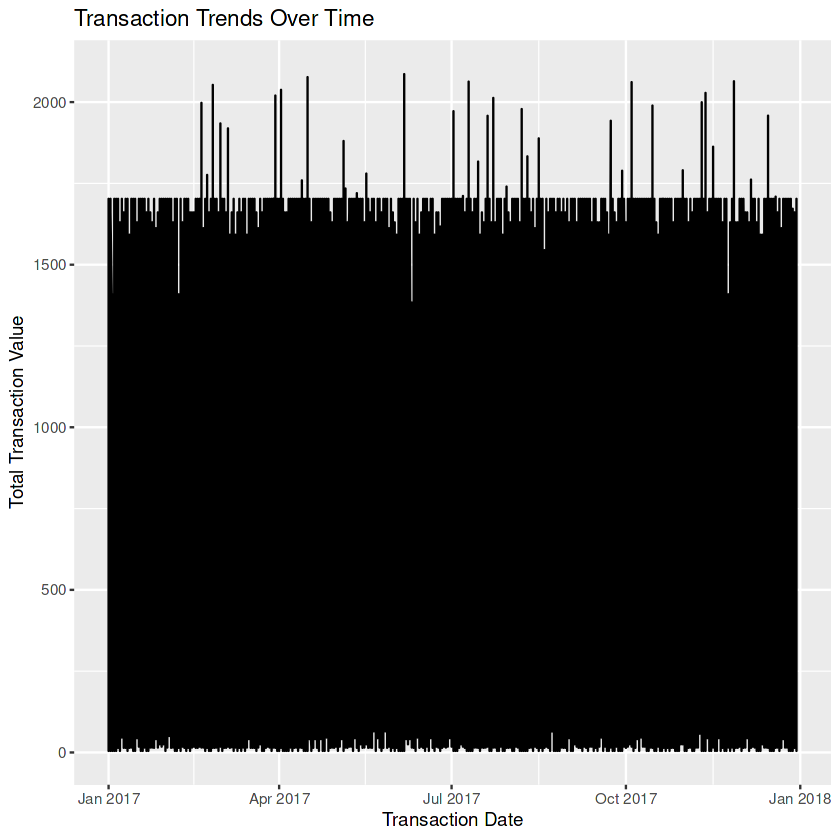

In [18]:
# Data Preparation
Transactions$transaction_date <- as.Date(Transactions$transaction_date)

# Feature Engineering
Transactions$total_transaction_value <- Transactions$list_price - Transactions$standard_cost

# Exploring Transaction Trends Over Time
library(ggplot2)
ggplot(Transactions, aes(x = transaction_date, y = total_transaction_value)) +
  geom_line() +
  labs(title = "Transaction Trends Over Time",
       x = "Transaction Date",
       y = "Total Transaction Value")



In [19]:
# Analyzing Purchase Patterns
top_products <- Transactions %>%
  group_by(product_id) %>%
  summarise(total_sales = sum(total_transaction_value)) %>%
  arrange(desc(total_sales)) %>%
  head(10)

#Printing top products based on total sales made
print(top_products)


# A tibble: 10 × 2
   product_id total_sales
        <dbl>       <dbl>
 1          3     602703.
 2          0     320765.
 3         38     306142.
 4         57     282033.
 5         46     261711.
 6         89     250775.
 7         63     240150.
 8         12     238906.
 9         54     236450.
10         37     236325.


In [20]:
# Calculating Key Metrics
avg_transaction_value <- mean(Transactions$total_transaction_value)
total_revenue <- sum(Transactions$total_transaction_value)

#defining threshold values
#threshold value for Total revenue and avg transaction value
threshold_value_1 <- 1000
threshold_value_2 <- 527

# Creating a new variable 'segment' based on total revenue and average transaction value
# Segmenting Customers
transaction_data <- Transactions %>%
  mutate(segment = case_when(
    total_revenue >= threshold_value_1 & avg_transaction_value >= threshold_value_2 ~ "High Value",
    total_revenue >= threshold_value_1 & avg_transaction_value < threshold_value_2 ~ "High Revenue, Low Avg Transaction",
    total_revenue < threshold_value_1 & avg_transaction_value >= threshold_value_2 ~ "Low Revenue, High Avg Transaction",
    TRUE ~ "Low Value"
  ))

# View the segmented dataset
head(transaction_data)


transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,total_transaction_value,segment
<dbl>,<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,2,2950,2017-02-25,FALSE,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,17.87,High Value
2,3,3120,2017-05-21,TRUE,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,1702.55,High Value
3,37,402,2017-10-16,FALSE,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,1544.61,High Value
4,88,3135,2017-08-31,FALSE,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145,817.36,High Value
5,78,787,2017-10-01,TRUE,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226,1055.82,High Value
6,25,2339,2017-03-08,TRUE,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031,709.34,High Value


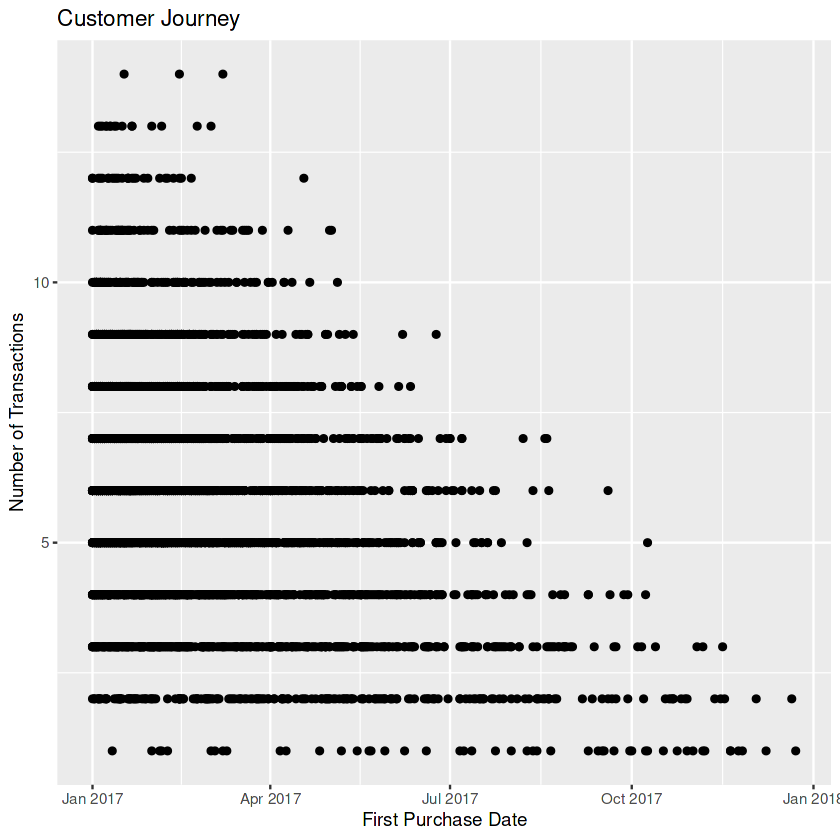

In [21]:
# Exploring Customer Journey
customer_journey <- Transactions %>%
  arrange(customer_id, transaction_date) %>%
  group_by(customer_id) %>%
  summarise(transactions = n(),
            first_purchase_date = first(transaction_date),
            last_purchase_date = last(transaction_date))

# Visualizing Customer Journey
ggplot(customer_journey, aes(x = first_purchase_date, y = transactions)) +
  geom_point() +
  labs(title = "Customer Journey",
       x = "First Purchase Date",
       y = "Number of Transactions")

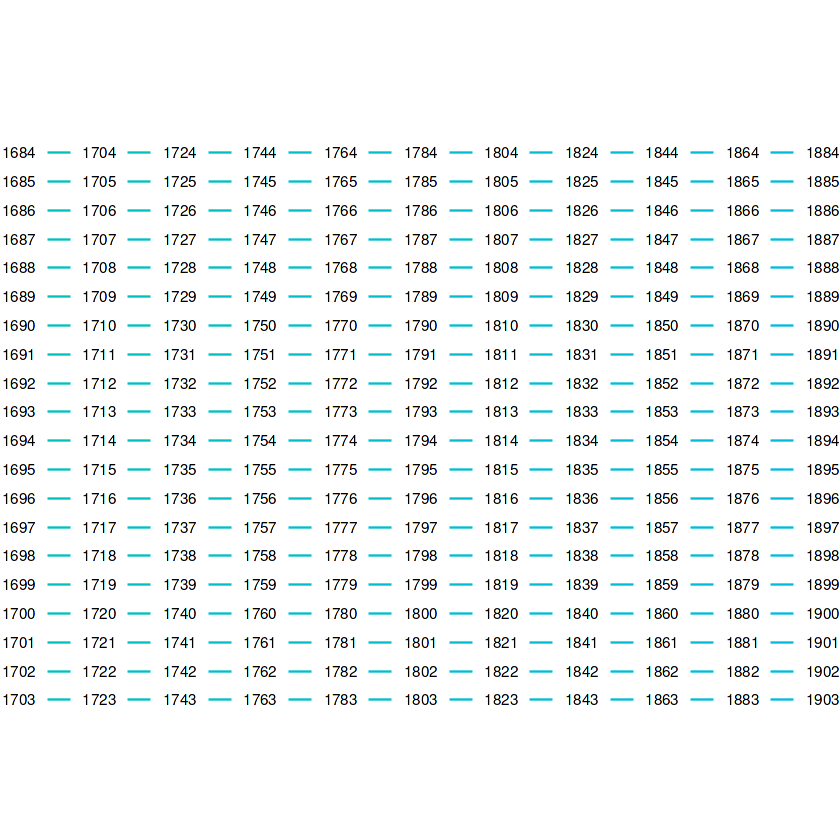

In [22]:
#Visulaizing customer journey of the top 10 customers
top_10_customers <- Transactions %>%
  group_by(customer_id) %>%
  arrange(desc(total_transaction_value)) %>%
  slice_head(n = 10)

# Line Chart for Customer Journey
ggplot(top_10_customers, aes(x = transaction_date, y = total_transaction_value, group = customer_id, color = as.factor(customer_id))) +
  geom_line() +
  labs(title = "Customer Journey - Top 10 Customers with Highest Transactions",
       x = "Transaction Date",
       y = "Total Transaction Value",
       color = "Customer ID") +
  theme_minimal()


# Finished

These are the customer ID's who have made the highest transactions so far. They are ripe for re-targeting.